<a href="https://colab.research.google.com/github/Socio-Crypto/AxelarPyScanner/blob/main/AxelarPyScanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

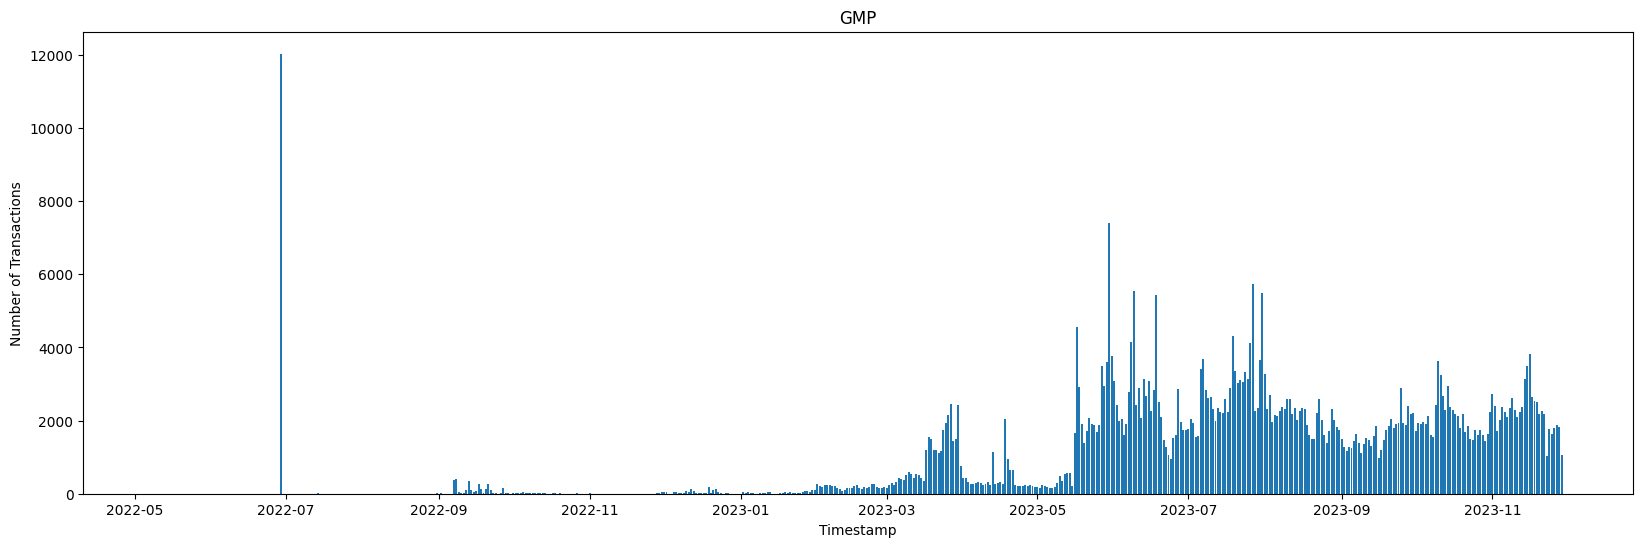

In [ ]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

url = "https://api.gmp.axelarscan.io"
params = {
    "method": "GMPChart"
}

response = requests.post(url, params=params)

if response.status_code == 200:
    data = response.json().get("data", [])

    timestamps = [datetime.utcfromtimestamp(entry["timestamp"] / 1000).date() for entry in data]
    num_txs = [entry["num_txs"] for entry in data]
    plt.figure(figsize=(20, 6))
    plt.bar(timestamps, num_txs, width=0.8, align='center')
    plt.xlabel('Timestamp')
    plt.ylabel('Number of Transactions')
    plt.title('GMP')

    plt.show()
else:
    print("Request failed with status code:", response.status_code)
    print("Response:", response.text)


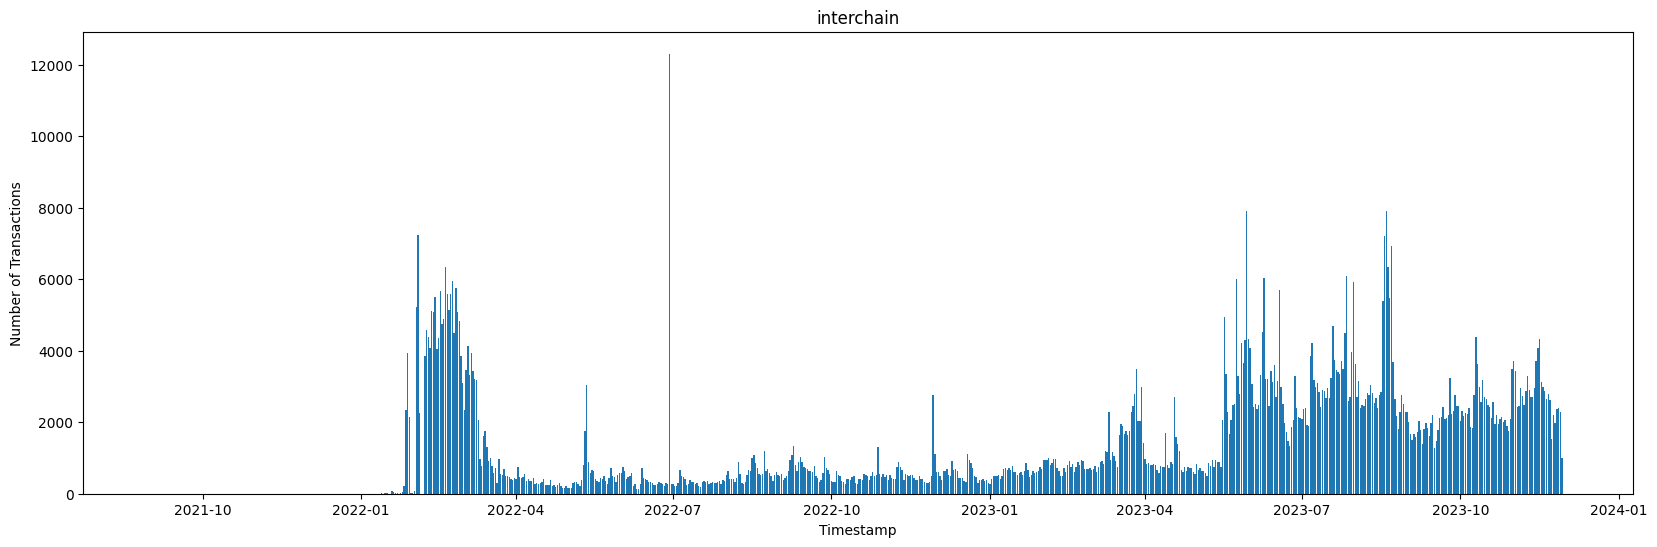

In [ ]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

url = "https://api.axelarscan.io"
params = {
    "method": "interchainChart",
    "granularity": "day",
}

response = requests.post(url, params=params)

if response.status_code == 200:
    data = response.json().get("data", [])

    timestamps = [datetime.utcfromtimestamp(entry["timestamp"] / 1000).date() for entry in data]
    num_txs = [entry["num_txs"] for entry in data]
    plt.figure(figsize=(20, 6))
    plt.bar(timestamps, num_txs, width=0.8, align='center')
    plt.xlabel('Timestamp')
    plt.ylabel('Number of Transactions')
    plt.title('interchain')

    plt.show()
else:
    print("Request failed with status code:", response.status_code)
    print("Response:", response.text)


In [ ]:
import requests
import pandas as pd
from tabulate import tabulate


url = "https://api.axelarscan.io"
params = {
    "method": "searchTransfers",
    "fromTime": 1701043140,
    "toTime": 1701129540,
    "status" : "executed"
}

response = requests.post(url, params=params)

if response.status_code == 200:
    data = response.json()["data"]
    extracted_data = [
    {
        "created_at": pd.to_datetime(item["send"]["created_at"]["ms"], unit="ms"),
        "txhash": item["send"]["txhash"],
        "source_chain": item["send"]["source_chain"],
        "destination_chain": item["send"]["destination_chain"],
        "amount_received": item["send"]["amount_received"],
        "sender_address": item["send"]["sender_address"],
    }
    for item in data
    ]

    df = pd.DataFrame(extracted_data)
    print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))

else:
    print(f"Request failed with status code {response.status_code}: {response.text}")


╒═════════════════════╤════════════════════════════════════════════════════════════════════╤════════════════╤═════════════════════╤═══════════════════╤═══════════════════════════════════════════════╕
│ created_at          │ txhash                                                             │ source_chain   │ destination_chain   │   amount_received │ sender_address                                │
╞═════════════════════╪════════════════════════════════════════════════════════════════════╪════════════════╪═════════════════════╪═══════════════════╪═══════════════════════════════════════════════╡
│ 2023-11-27 23:57:58 │ E80A8163437A0129AE39590258657A3F192483820DD4C9CF7F99AB698912FE87   │ umee           │ osmosis             │          49.8     │ umee1xjzz53a0382fzw78zsewclpmxakfr3qwncvk0p   │
├─────────────────────┼────────────────────────────────────────────────────────────────────┼────────────────┼─────────────────────┼───────────────────┼───────────────────────────────────────────────┤


In [ ]:
print(len(df))

25


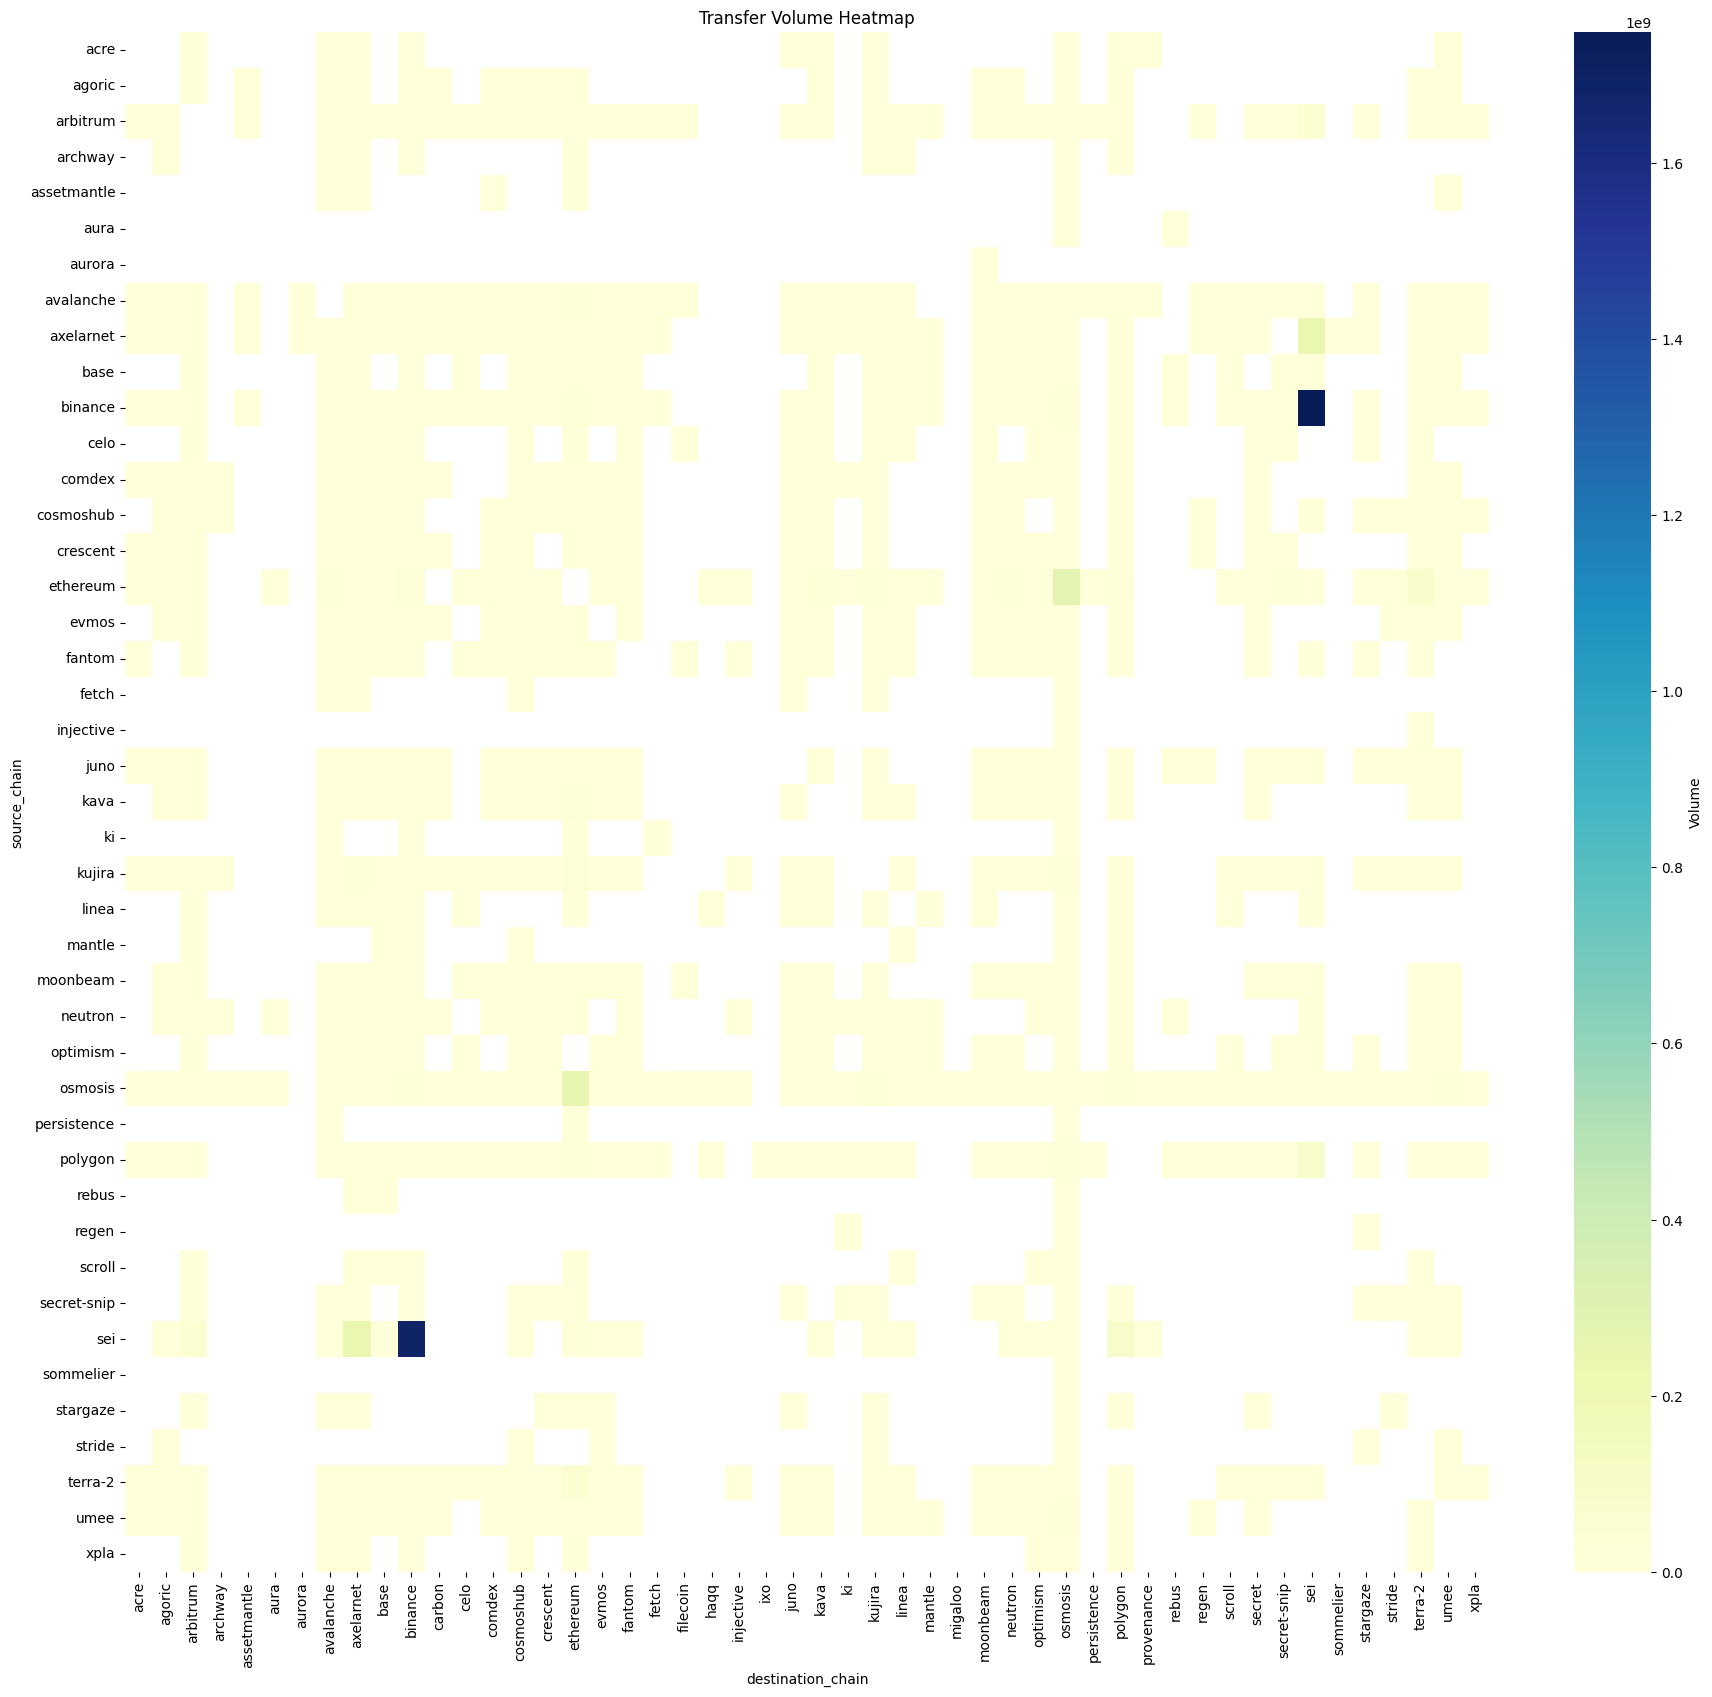

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://api.axelarscan.io"
params = {
    "method": "transfersStats",
    "asset" : "uusdc"
}

response = requests.post(url, params=params)

if response.status_code == 200:
    data = response.json()["data"]

    # Create a DataFrame from the API response data
    df = pd.DataFrame(data)

    # Create a pivot table for the heatmap
    pivot_table = df.pivot_table(values="volume", index="source_chain", columns="destination_chain")

    # Create a heatmap using seaborn
    plt.figure(figsize=(22, 20))
    sns.heatmap(pivot_table, annot=False, cmap="YlGnBu", fmt=".0f", cbar_kws={'label': 'Volume'})
    plt.title('Transfer Volume Heatmap')


    plt.show()
else:
    print(f"Request failed with status code {response.status_code}: {response.text}")


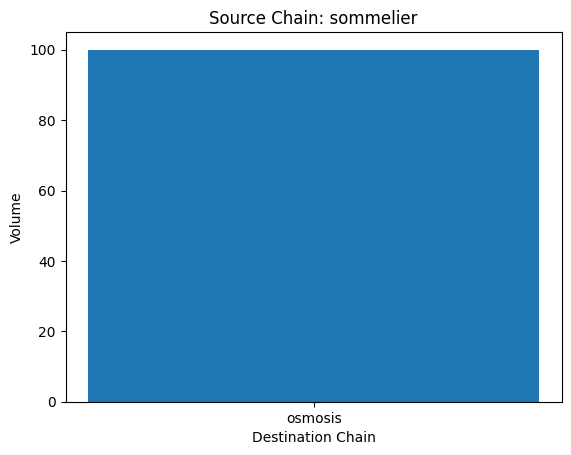

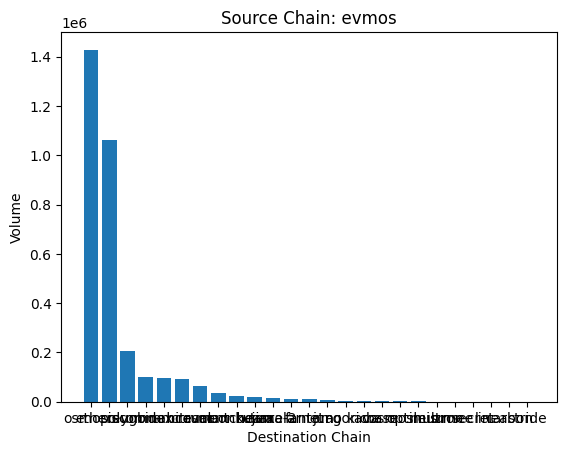

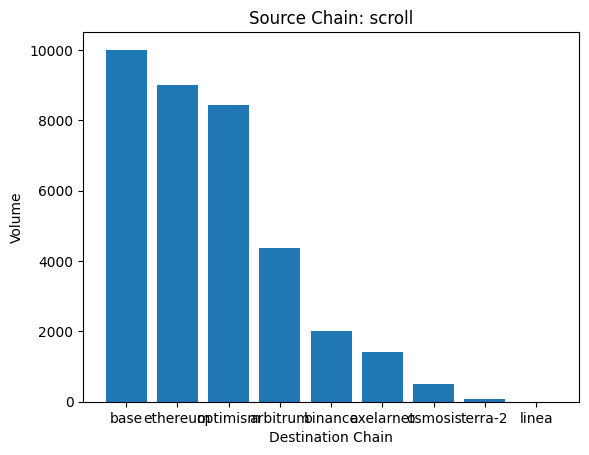

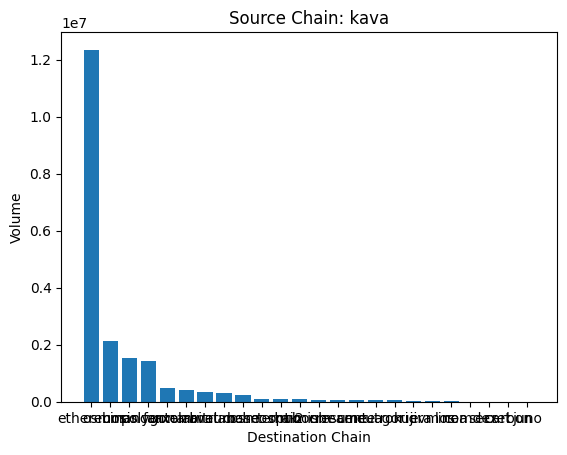

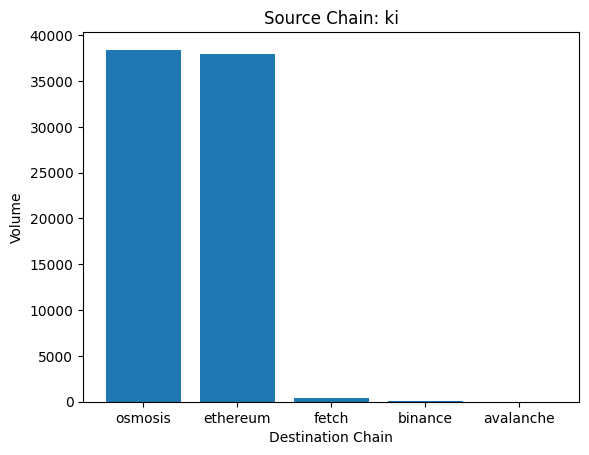

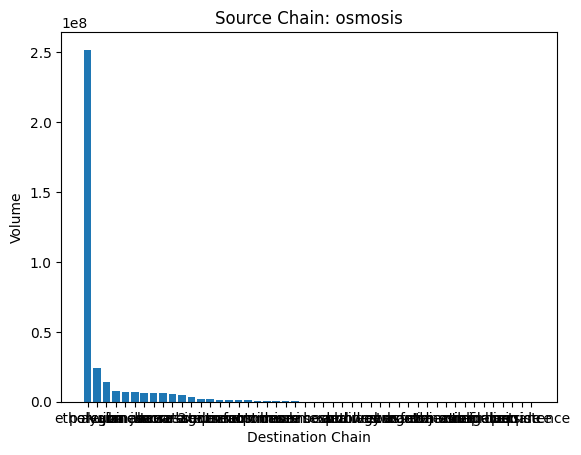

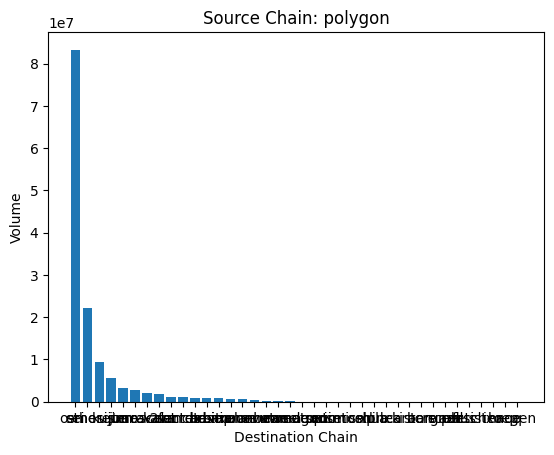

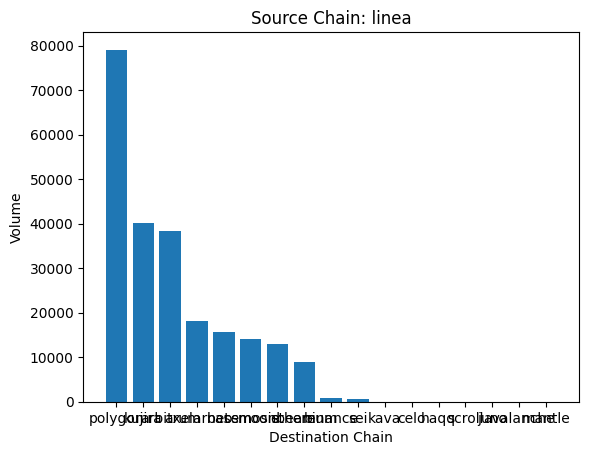

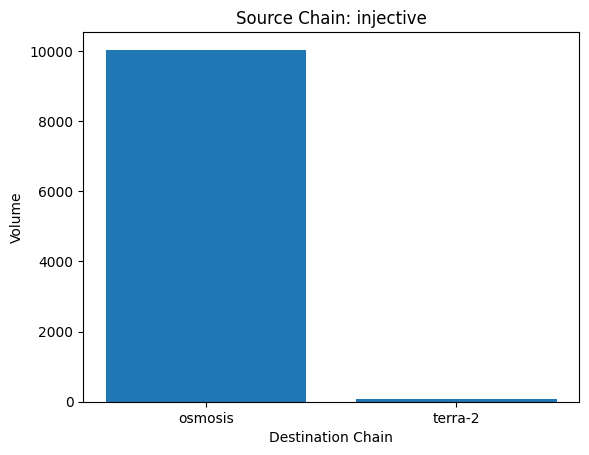

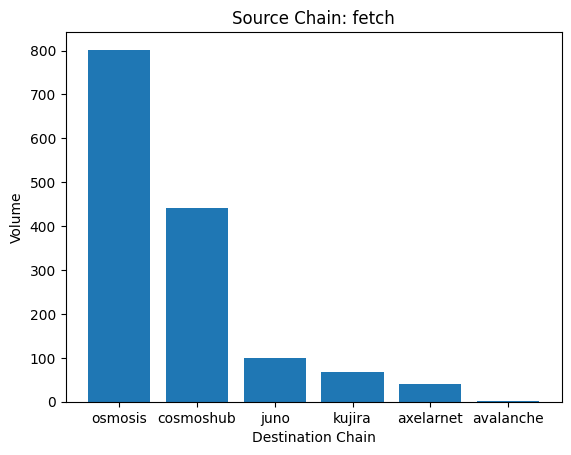

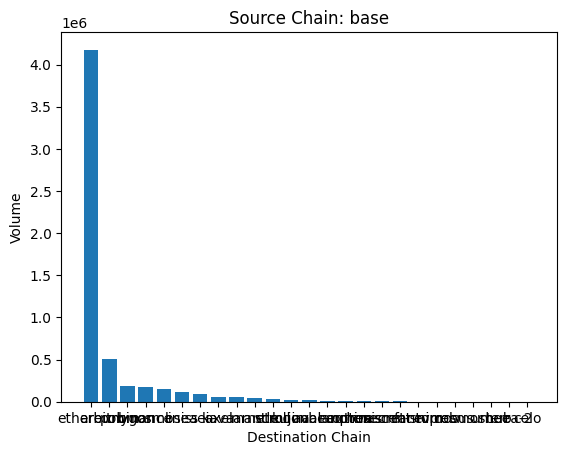

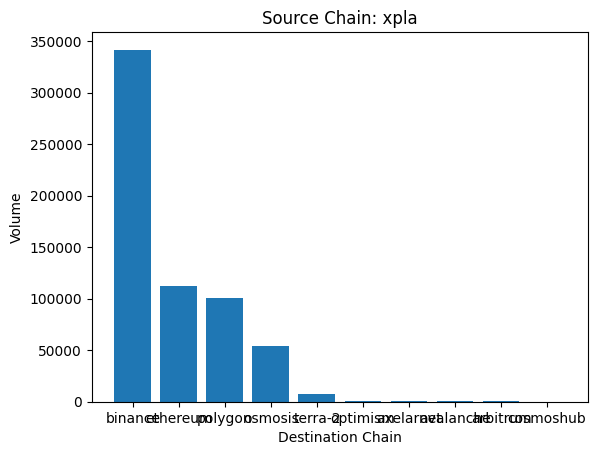

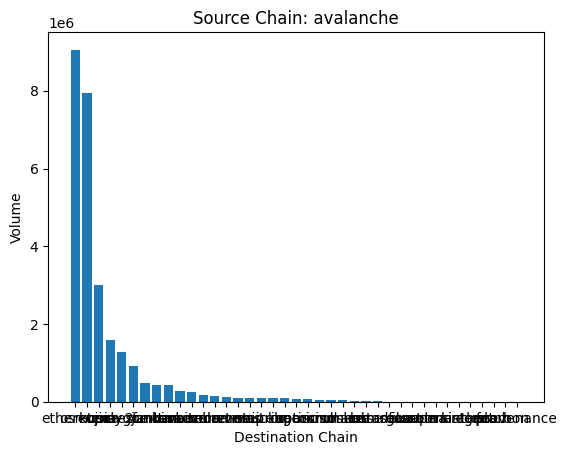

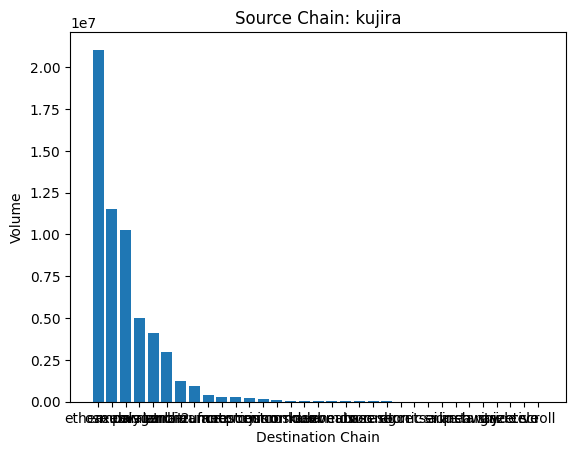

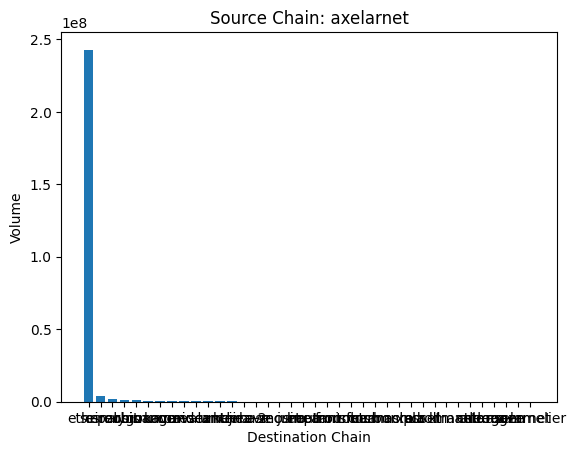

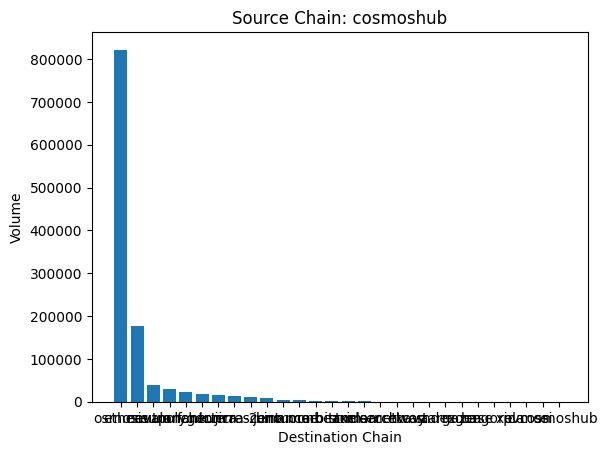

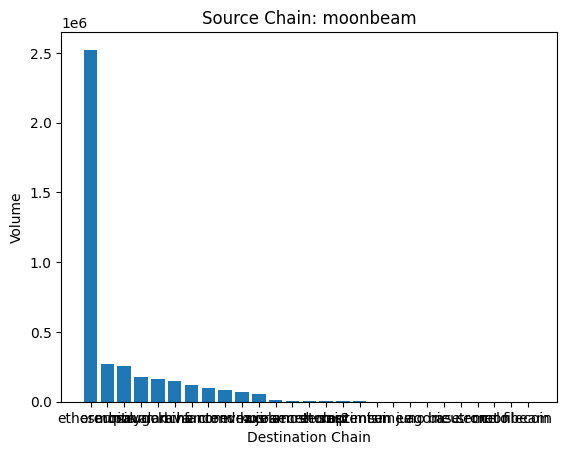

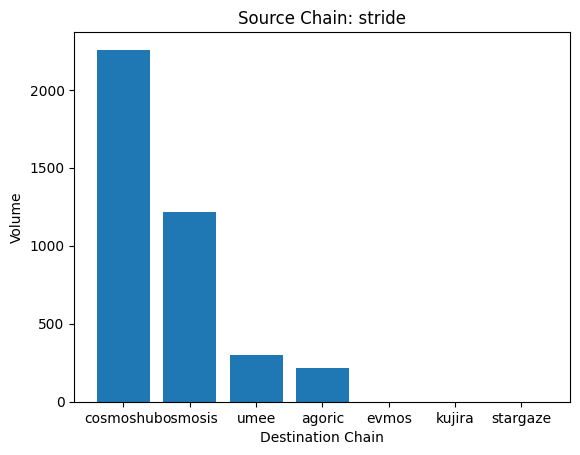

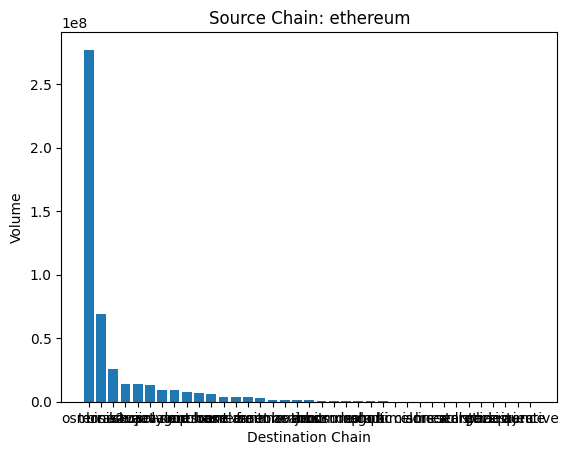

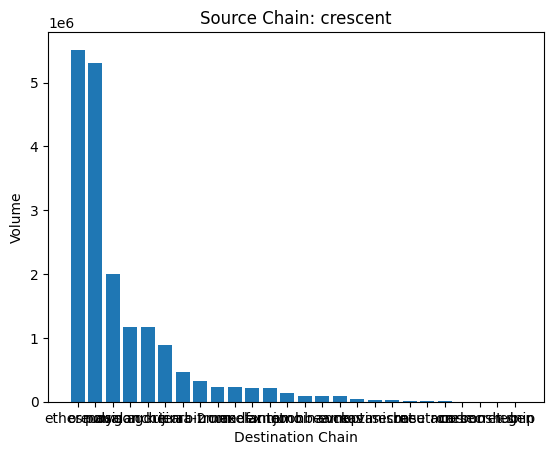

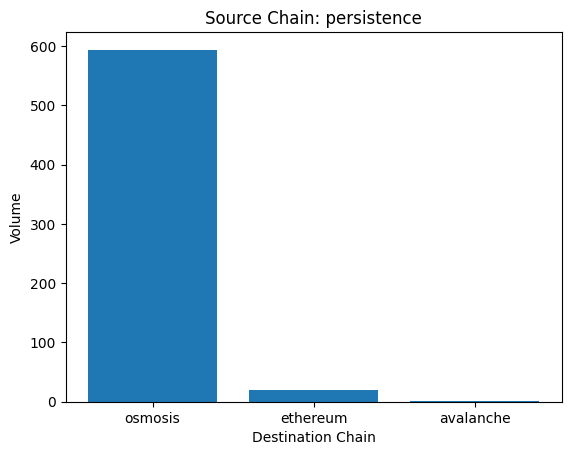

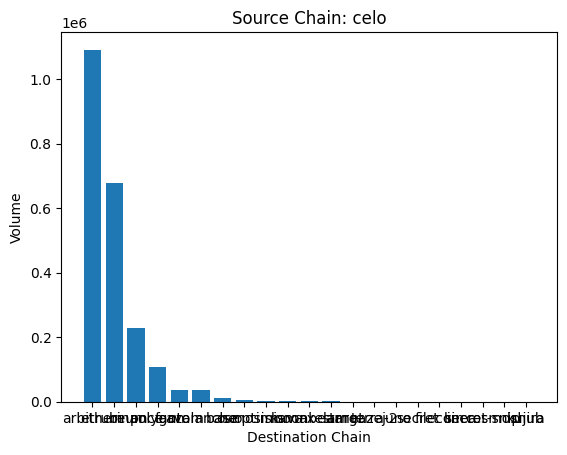

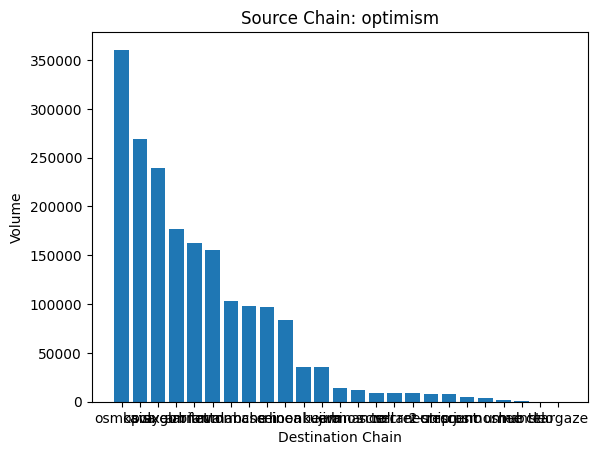

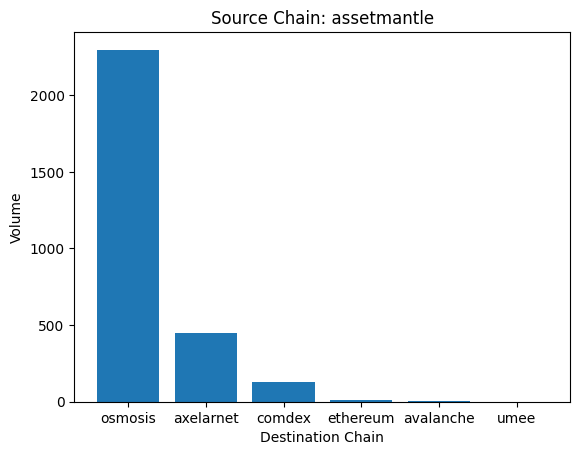

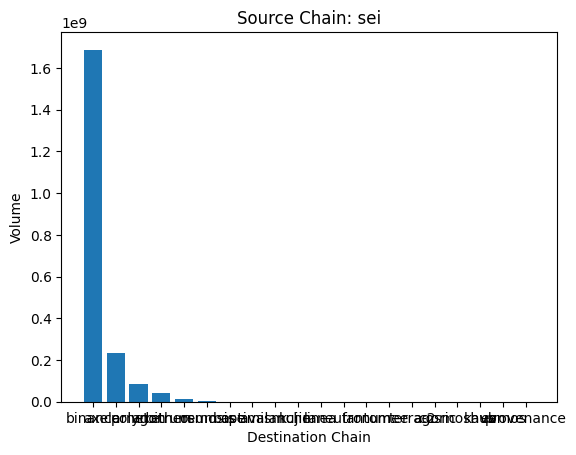

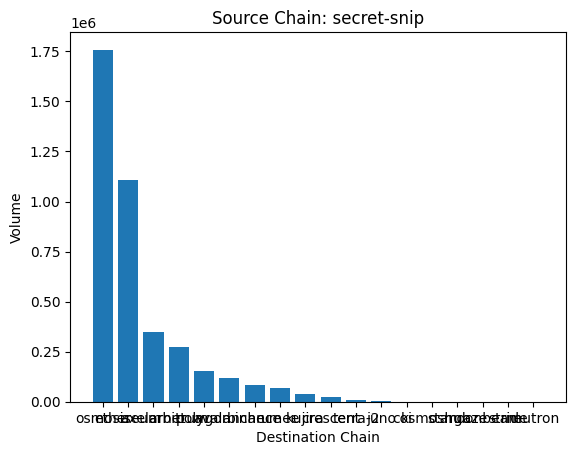

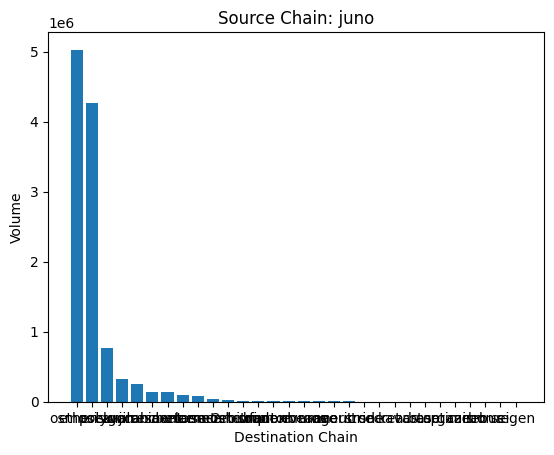

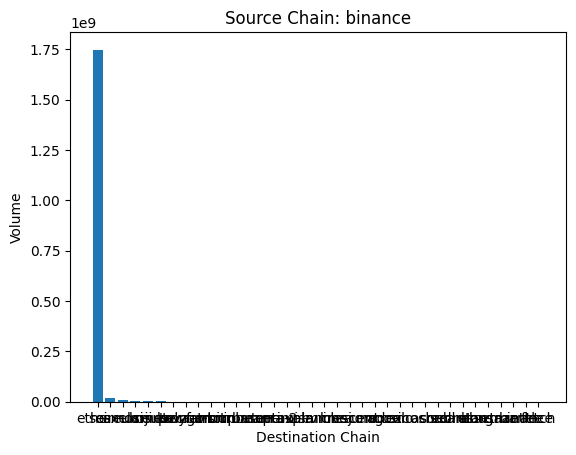

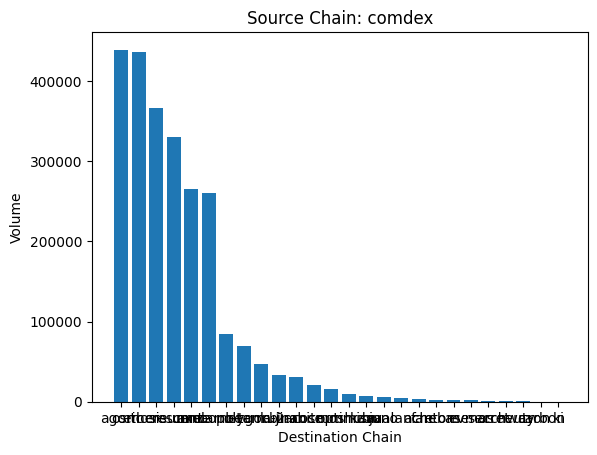

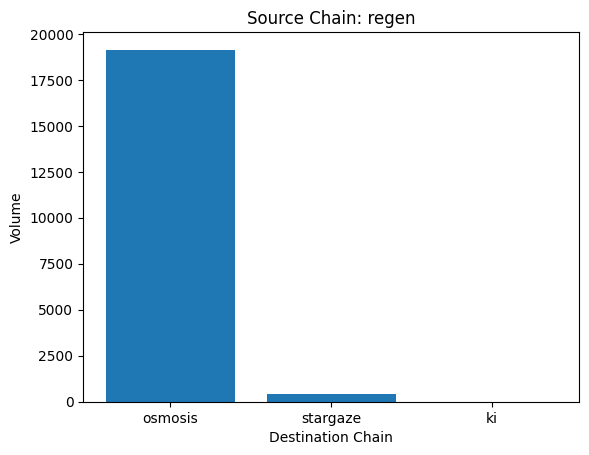

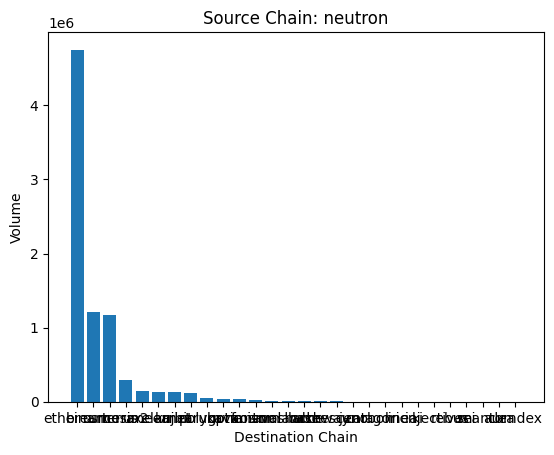

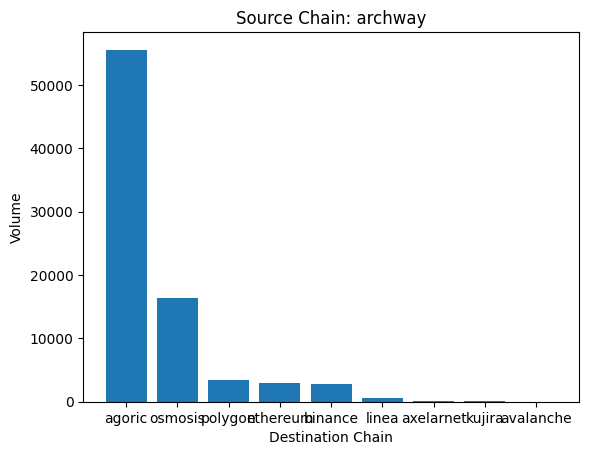

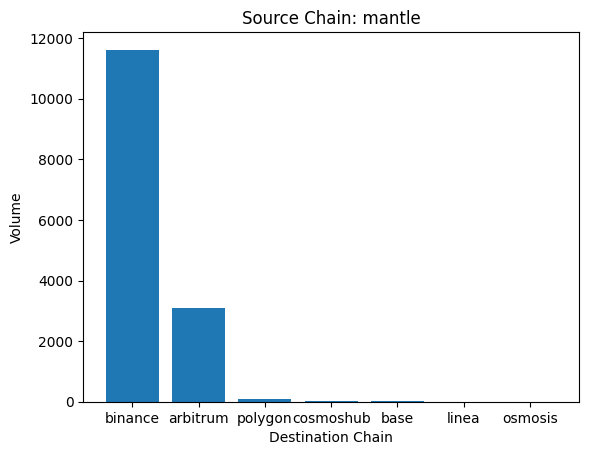

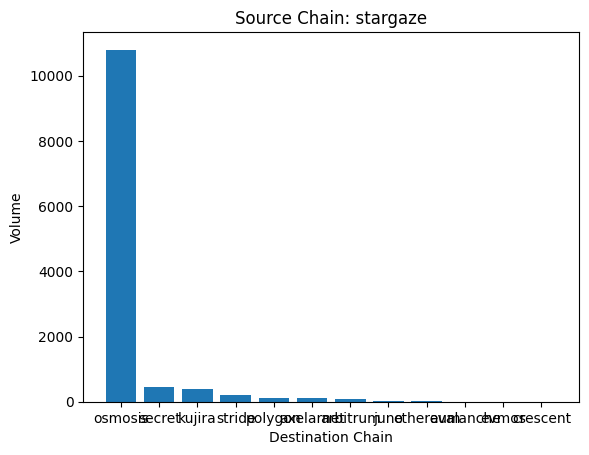

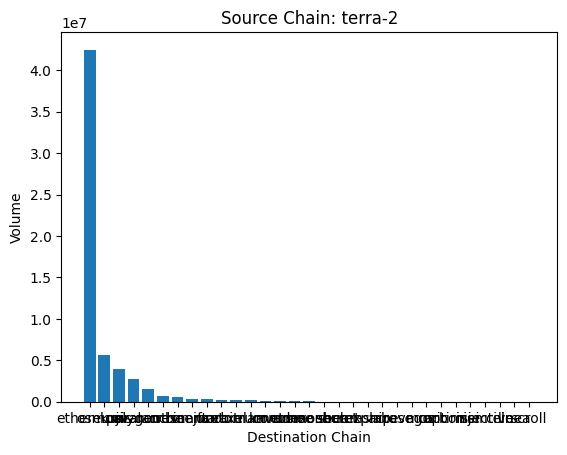

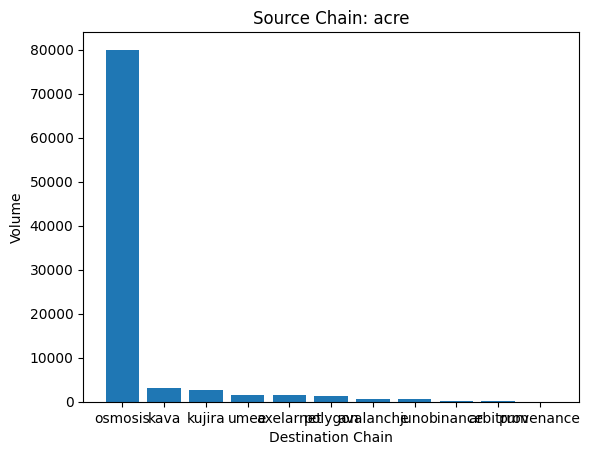

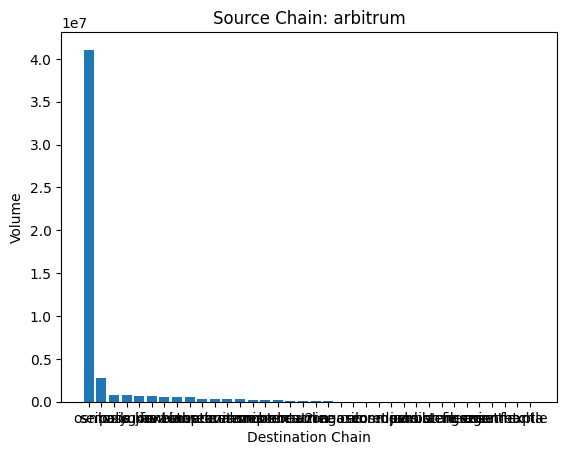

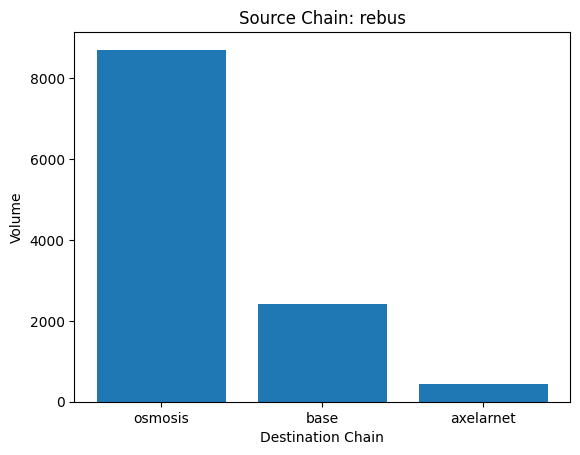

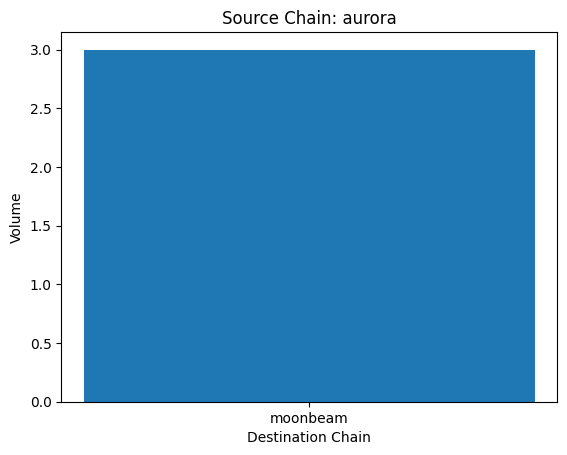

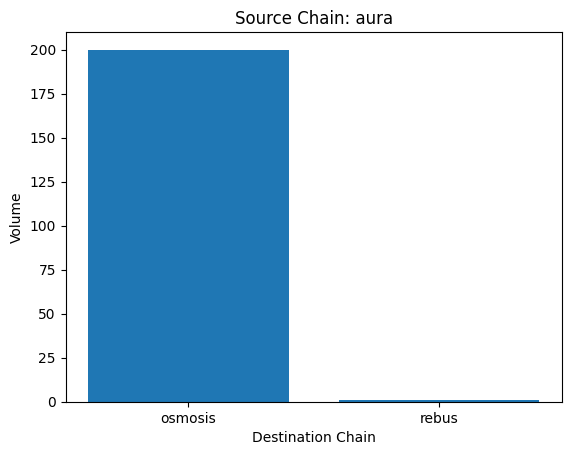

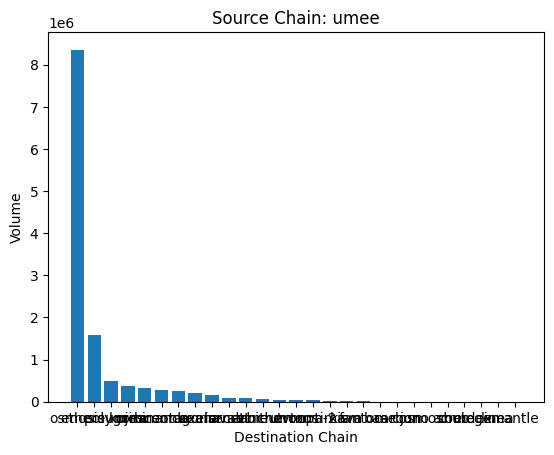

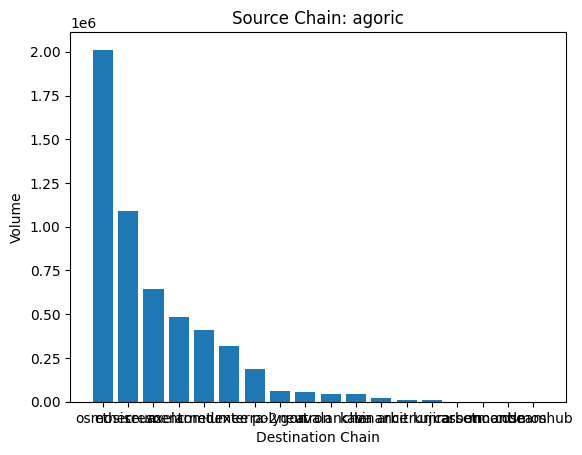

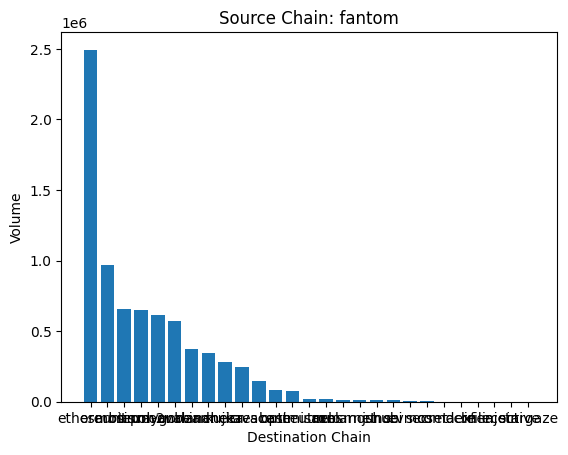

In [ ]:
source_chains = set(entry["source_chain"] for entry in data)
destination_chains = set(entry["destination_chain"] for entry in data)

# Create a bar chart for each source chain
for source_chain in source_chains:
    filtered_data = [entry for entry in data if entry["source_chain"] == source_chain]
    destinations = [entry["destination_chain"] for entry in filtered_data]
    volumes = [entry["volume"] for entry in filtered_data]

    plt.bar(destinations, volumes)
    plt.xlabel("Destination Chain")
    plt.ylabel("Volume")
    plt.title(f"Source Chain: {source_chain}")
    plt.show()